In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
def formatta( nomefile ):
    reading_file = open( str( nomefile ), "r" )

    new_file_content = ""
    for line in reading_file:
        stripped_line = line.strip( )
        new_line = stripped_line.replace( ",", "." )
        new_file_content += new_line +"\n"
    reading_file.close( )

    writing_file = open( str( nomefile ), "w" )
    writing_file.write( new_file_content )
    writing_file.close( )

# Esperienze 4: misura del coefficiente adiabatico
**Data**: 23 Novembre 2022
**Gruppo**: 18

## Materiale

| Descrizione                            | Caratteristiche                                                 |
|:---------------------------------------|:----------------------------------------------------------------|
| Sensore di bassa pressione CI-6534     | $\cdot$ Portata -> $10 kPa$ $\cdot$ Risoluzione -> $10^-15 kPa $|
| Bottiglia di vetro in pyrex            |                                                               |
| Siringa                                | $\cdot$ Portata -> $60 mL$ $\cdot$ Risoluzione -> $1 mL$        |





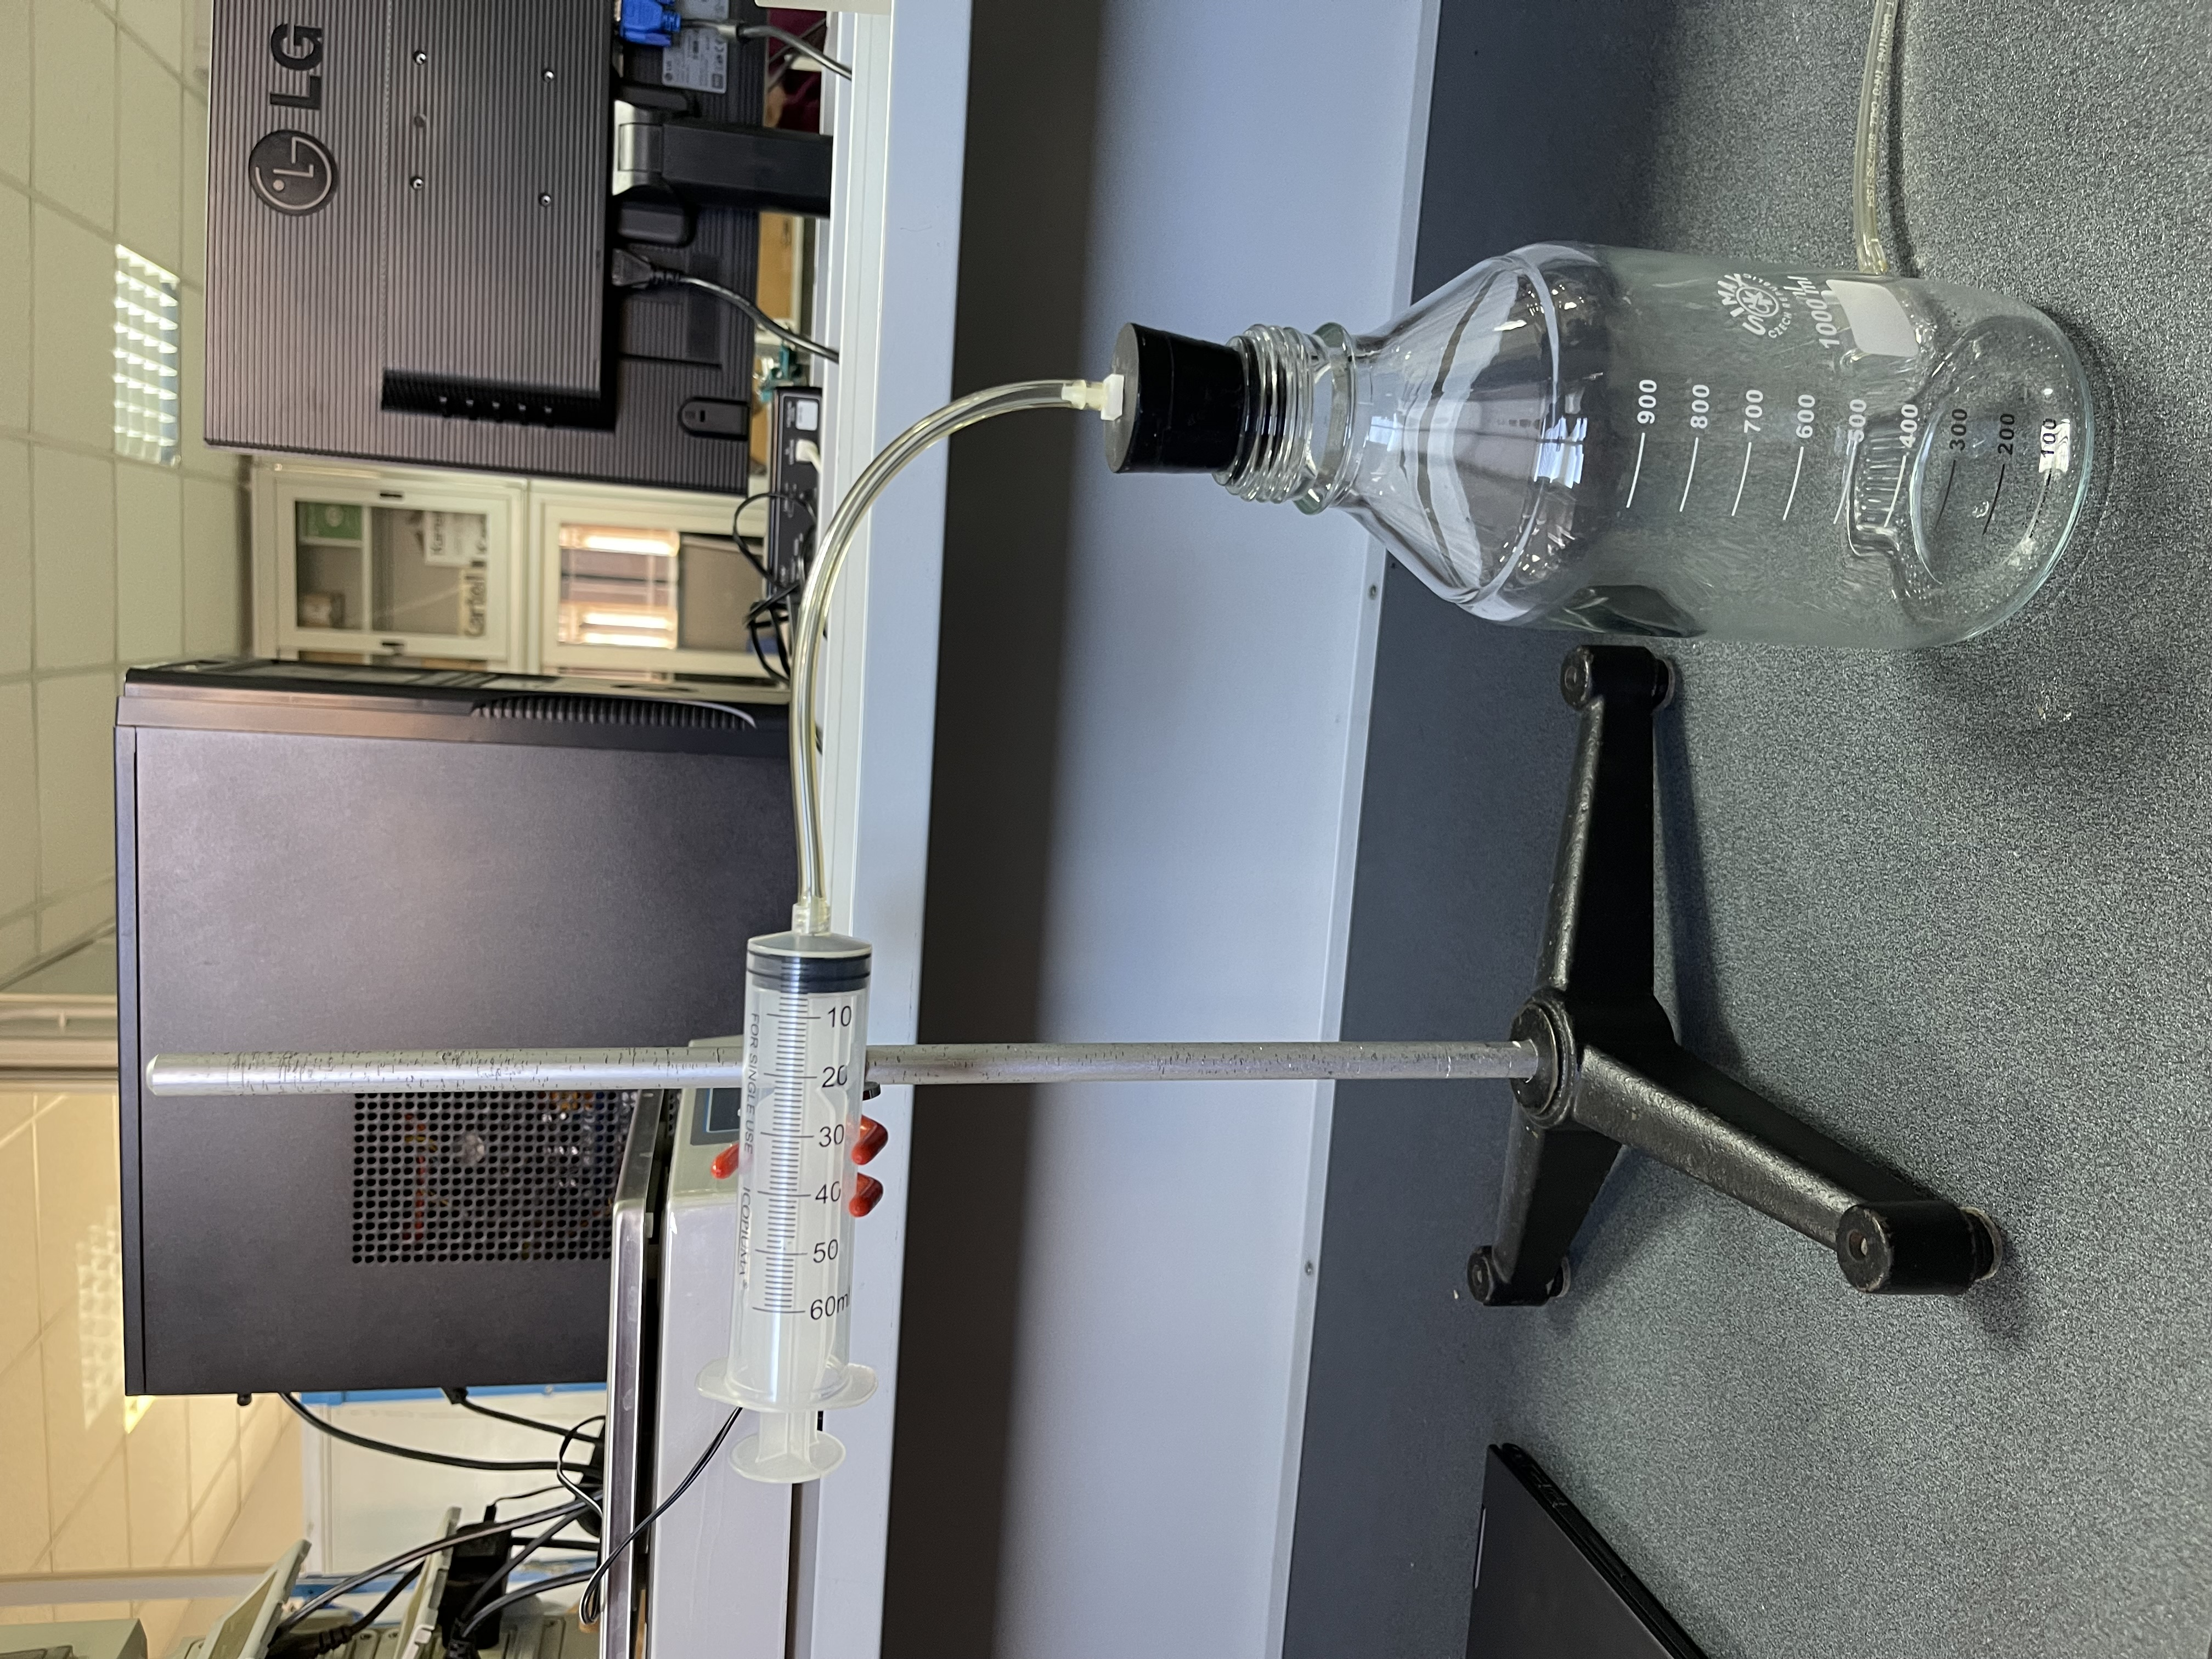

In [3]:
Image( filename = 'IMG_6633.jpeg' )

In [24]:
Vtot = 1111 #mL Volume di bottiglia, tubicini e siringa a fine corsa (misura senza incertezza)
V_siringa = 60 #mL
sigma_P = 10**-15 #kPa
sigma_V = 1 #mL
campfreq_suo= 20000 #Hz
sigma_t=10**-16 #s
v_suo=342 #m/s
sigma_v_suo=1 #m/s

## 1. Misura del coefficiente adiabatico

Le misurazioni sono state effettuate utilizzando una siringa graduata collegata tramite un tubo a una bottiglia di vetro in Pyrex, la quale a sua volta è connessa a un sensore di bassa pressione.\
Viene calibrato il sensore di pressione con la pressione atmosferica in laboratorio.

Viene inizialmente posta la siringa in modo tale che il gas al suo interno abbia un certo volume iniziale $V_0$ e viene avviata la presa dati di $\Delta P$ in funzione del tempo $t$.\
Viene poi effettuata una rapida compressione $\Delta V = -V_0$ spingendo il pistone fino a fine corsa, dove viene mantenuto per un intervallo di tempo tra i $2$ e i $3$ minuti.

Il procedimento viene ripetuto per vari $\Delta V_j$ differenti.


Graficando $\Delta P$ in funzione del tempo $t$ e osservando la curva che si viene a formare è possibile notare una prima sezione in cui vi è una trasformazione adiabatica, in quanto, per la rapidità della compressione, il sistema non scambia calore con l'esterno. Successivamente la pressione del sistema si stabilizza poiché questo, scambiando calore con l'esterno, torna a temperatura ambiente. Il tutto può essere considerato come una trasformazione isoterma.\
Si può quindi stimare $\gamma$ a partire dal rapporto delle compresibilità adiabatica e isoterma:\
$$\gamma=\frac{c_p}{c_v}=\frac{\beta_T}{\beta_s}$$

dove

$$\beta_T\cong-\frac{1}{V}\left(\frac{\Delta V}{\Delta P}\right)_T \ \ \ \ \ \beta_S\cong-\frac{1}{V}\left(\frac{\Delta V}{\Delta P}\right)_S $$

Da notare che non è possibile effettuare variazioni infinitesimali, perciò sono state impiegate variazioni di volume $\Delta V$ piccole ma finite, a cui corrispondono piccole variazioni di pressione $\Delta P$ (motivo per cui le due compressibilità sono state espresse come approssimazioni).

Essendo $\Delta V_S$ e $\Delta V_T$ coincidenti in questo esperimento, la formula di $\gamma$ si può riscrivere come:
$$\gamma=\frac{c_p}{c_v}=\frac{\beta_T}{\beta_s} = \frac{\left(\frac{\Delta V}{\Delta P}\right)_T } {\left(\frac{\Delta V}{\Delta P}\right)_S} = \frac{(\Delta P)_S}{(\Delta P)_T}$$
Viene quindi calcolato $\gamma_j$ per i vari $\Delta V_j$ e ne viene fatta la media (pesata con le $\sigma_{\gamma_j}$) per stimare $\gamma$.
$$\sigma=\sqrt{\left(\frac{\sigma_P}{\Delta P_T}\right)^2+\left(\frac{\sigma_P \Delta P_S}{\Delta P_T^2}\right)^2}$$

Viene preso $(\Delta P)_S$ pari al valore del massimo globale e $(\Delta P)_T$ pari all'ultimo valore misurato.

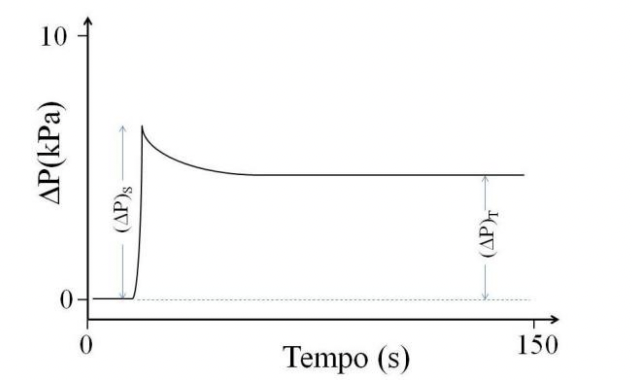

In [177]:
Image( filename = 'Screenshot 2022-12-17 at 20.15.52.png' )

### Dati
Tutti i volumi sono espressi in $mL$, i tempi in $s$ e le pressioni in $kPa$. \
`array` = array contenente i $\Delta V_j$;\
`DP_i` = valori aquisiti di pressione con relativo tempo `t_i`;\
`gammas` = array contenente i valori del coefficiente adiabatico relativi ai diversi volumi;\
`gamma` = stima finale del coefficiente adiabatico dell'aria;\
`sigma_` = incertezza sulla misura.

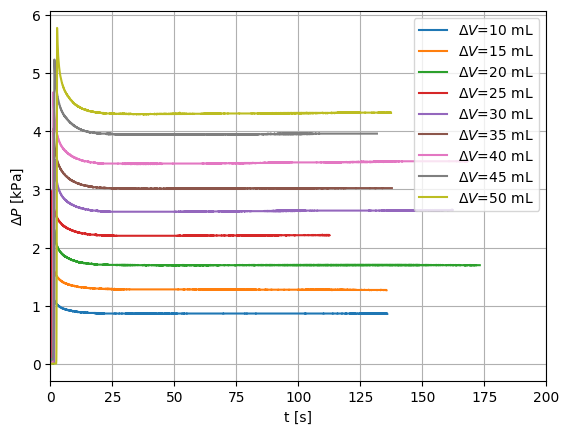

In [179]:
array = np.arange( 10, 55, 5 )

for i in array:
    title = "Dp"+str( i )+".dat"
    formatta( title )
    
    globals( )[ 't_{}'.format( i ) ], globals( )[ 'DP_{}'.format( i ) ] = np.loadtxt( title, unpack = True, usecols = ( 0, 1 ), skiprows = 2 )
    
    
for i in array:
    plt.plot( globals( )[ 't_{}'.format( i ) ], globals( )[ 'DP_{}'.format( i ) ],marker="", linestyle = "-", label = ( "$\Delta V$=%s mL"%( str( i ) ) ) )
plt.legend( )
plt.xlabel( "t [s]" )
plt.ylabel( "$\Delta P$ [kPa]" )
plt.xlim( 0, 200 )
#plt.xlim( 135.5, 135.9)
#plt.ylim( 1.26,1.28)
plt.grid( )   

In [ ]:
sigma_P_asint= 2*10**-3 #kPa

gammas = np.zeros( 9 )
sigma_gammas = np.zeros( 9 )
n = 0
for i in array:
    gammas[ n ] = max( globals( )['DP_{}'.format( i ) ] ) / globals( )[ 'DP_{}'.format( i ) ][ len( globals( )[ 'DP_{}'.format( i ) ] ) - 1 ]
    sigma_gammas[ n ]=( ( sigma_P / globals( )[ 'DP_{}'.format( i ) ][ len( globals( )[ 'DP_{}'.format( i ) ] ) - 1 ] ) ** 2 + ( sigma_P_asint * max( globals( )[ 'DP_{}'.format( i ) ] ) / (globals( )[ 'DP_{}'.format( i ) ][ len( globals( )[ 'DP_{}'.format( i ) ] ) - 1 ] **2 ) ) **2 ) ** 0.5
    n = n + 1
    
    
gamma = ( np.sum( gammas / ( sigma_gammas ** 2 ) ) ) / ( np.sum( 1 / ( sigma_gammas ** 2 ) ) )
sigma_gamma = 1 / ( np.sum( 1 / ( sigma_gammas ** 2 ) ) ) ** 0.5

print( "gamma = %.4lf ± %.4lf" %( gamma, sigma_gamma ) )

Considerando che il coefficiente adiabatico dell'aria secca vale $\gamma_{as}= 1.4$ e il coefficiente dell'acqua vale $\gamma_{H_2O}= 1.32$ ci si aspettava un valore compreso in questo range.

### Osservazione
A partire dai dati ottenuti è possibile ricavare gli andamenti di compressibilità isoterma ($\beta _T $) e isoentropica ($\beta_S$) al variare del volume.
È quindi sufficiente calcolare $\left(\frac{\Delta V}{\Delta P}\right)_T$ e $\left(\frac{\Delta V}{\Delta P}\right)_S$ effettuando una media pesata dei diversi valori per i vari $\Delta V_j$.

#### Dati:
`DPS` = array contenente i valori di $\Delta P_S$;\
`DPT` = array contenente i valori di $\Delta P_T$;\
`V` = array contenente dei valori di $V\in [300,10000] $;\
i suffissi `T` e `S` indicano, rispettivamente  le trasformazioni isoterma e isoentropica;\
`temp_` = array contenente i valori di $\left(\frac{\Delta V_j}{\Delta P_j}\right)$;\
`DV_DP` = $\left(\frac{\Delta V}{\Delta P}\right)$;\
`B` = compressibilità, misurata in $\frac{1}{kPa}$.

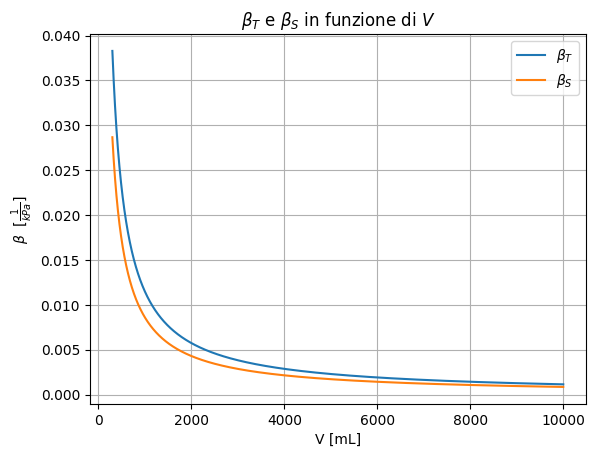

In [8]:
DPS= np.zeros(9)
DPT= np.zeros(9)
n=0
for i in array:
    DPS[n] = max(globals()['DP_{}'.format(i)])
    DPT[n] = globals()['DP_{}'.format(i)][len(globals()['DP_{}'.format(i)])-1]
    n=n+1 
    
    
    
    
V= np.arange ( 300, 10000, 1 )


tempT = -array/DPT
sigma_tempT = ((sigma_V/DPT)**2+(sigma_P*array/(DPT**2))**2)**0.5

DV_DPT = (np.sum(tempT/(sigma_tempT**2)))/(np.sum(1/(sigma_tempT**2)))
sigma_DV_DPT = 1/(np.sum(1/(sigma_tempT**2))**0.5)


tempS = -array/DPS
sigma_tempS = ((sigma_V/DPS)**2+(sigma_P*array/(DPS**2))**2)**0.5

DV_DPS = (np.sum(tempS/(sigma_tempS**2)))/(np.sum(1/(sigma_tempS**2)))
sigma_DV_DPS = 1/(np.sum(1/(sigma_tempS**2))**0.5)


BT = - ( 1 / V ) * DV_DPT
BS = - ( 1 / V ) * DV_DPS


plt.title("$\\beta_T$ e $\\beta_S$ in funzione di $V$" )
plt.xlabel("V [mL]")
plt.ylabel("$\\beta \\ \\ [\\frac{1}{kPa}] $")
plt.plot(V,BT, linestyle = "-", label="$\\beta_T$")
plt.plot(V,BS, linestyle = "-", label="$\\beta_S$")
plt.legend()
plt.grid()


A questo punto si è in grado di calcolare la compressibilità di questo sistema per qualunque volume, come, ad esempio, per le varie configurazioni di volume $V_j = V_{tot}-(V_{siringa}-\Delta V)$:

In [9]:
BT_mis =  - ( 1 / (Vtot-(60-array)) ) * DV_DPT
sigma_BT_mis = sigma_DV_DPT/(Vtot-(60-array))

BS_mis =  - ( 1 / (Vtot-(60-array)) ) * DV_DPS
sigma_BS_mis = sigma_DV_DPS/(Vtot-(60-array))


for i in range(0,9):
    print("V=%g --> Beta_T= (%.4lf ± %.4lf) 1/kPa ----------- Beta_S= (%.5lf ± %.5lf) 1/kPa" %((Vtot-(60-array[i])), BT_mis[i], sigma_BT_mis[i],BS_mis[i], sigma_BS_mis[i]))

    

V=1061 --> Beta_T= (0.0108 ± 0.0001) 1/kPa ----------- Beta_S= (0.00811 ± 0.00008) 1/kPa
V=1066 --> Beta_T= (0.0108 ± 0.0001) 1/kPa ----------- Beta_S= (0.00807 ± 0.00008) 1/kPa
V=1071 --> Beta_T= (0.0107 ± 0.0001) 1/kPa ----------- Beta_S= (0.00803 ± 0.00008) 1/kPa
V=1076 --> Beta_T= (0.0107 ± 0.0001) 1/kPa ----------- Beta_S= (0.00799 ± 0.00008) 1/kPa
V=1081 --> Beta_T= (0.0106 ± 0.0001) 1/kPa ----------- Beta_S= (0.00796 ± 0.00008) 1/kPa
V=1086 --> Beta_T= (0.0106 ± 0.0001) 1/kPa ----------- Beta_S= (0.00792 ± 0.00008) 1/kPa
V=1091 --> Beta_T= (0.0105 ± 0.0001) 1/kPa ----------- Beta_S= (0.00788 ± 0.00008) 1/kPa
V=1096 --> Beta_T= (0.0105 ± 0.0001) 1/kPa ----------- Beta_S= (0.00785 ± 0.00008) 1/kPa
V=1101 --> Beta_T= (0.0104 ± 0.0001) 1/kPa ----------- Beta_S= (0.00781 ± 0.00008) 1/kPa


## 2. Stima della lunghezza della bottiglia a partire dall'oscillazione nella misura di pressione

Si è aumentata la frequenza di campionamento (`campfreq_suo`=$20000\ Hz$) e si è ripetuta la misura con un volume di compressione $\Delta V=5ml.$ Per rendere la compressione quanto più rapida possibile, si è sbattuto lo stantuffo della siringa sul tavolo invece di premerlo con la mano.

In [10]:
formatta('Dp5suono.dat')
t_suo,Dp_suo=np.loadtxt('Dp5suono.dat',unpack=True,usecols=(0,1),skiprows=2)

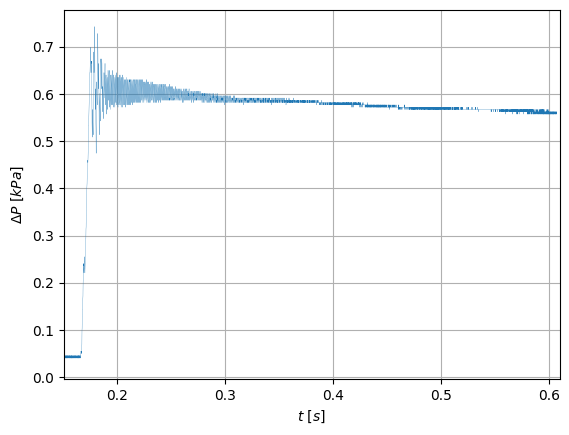

In [11]:
plt.xlim(0.15,0.61)
plt.xlabel('$t\ [s]$')
plt.ylabel('$\Delta P\ [kPa]$')
plt.plot(t_suo,Dp_suo,linewidth=0.2)
plt.grid()

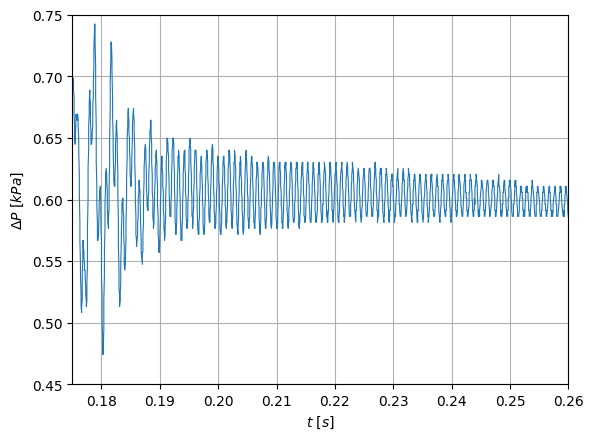

In [12]:
plt.xlim(0.175,0.26)
plt.ylim(0.45,0.75)
plt.xlabel('$t\ [s]$')
plt.ylabel('$\Delta P\ [kPa]$')
plt.plot(t_suo,Dp_suo,linewidth=0.8)
plt.grid()

Grazie all'alta frequenza di campionamento si nota che la pressione ha un andamento ondulatorio attorno alla curva vista con frequenza di campionamento più bassa. Si suppone che ciò sia dovuto al fatto che la variazione di pressione si propaga come un'onda all'interno della bottiglia, con velocità pari a quella del suono. Si può quindi stimare la lunghezza della bottiglia come metà della lunghezza dell'onda di pressione:

$$L=\frac{\lambda}{2}=\frac{v_{suo}T}{2}$$
$$\sigma_L=L\sqrt{\left(\frac{\sigma_T}{T}\right)^2+\left(\frac{\sigma_{v_{suo}}}{v_{suo}}\right)^2}$$

dove $v_{suo}=342\pm1 \ \frac{m}{s}$ e $T$ è il periodo dell'onda, calcolato dalla funzione `periodo`. Questa calcola il periodo a partire dall'intervallo di tempo e dal numero di massimi isolati della pressione, secondo la formula:

$$T=\frac{i_1-i_0}{\# massimi-1}\frac{1}{\nu_{camp}}$$
$$\sigma_T=\frac{i_1-i_0}{\# massimi-1}\sigma_{\frac{1}{\nu_{camp}}}=T\nu_{camp}\sigma_{\frac{1}{\nu_{camp}}}=T\nu_{camp}\sigma_{t}$$

dove $i_1, i_0$ sono gli indici corrispondenti al primo e all'ultimo punto di massimo isolato. Per evitare conteggi di massimi dovuti al rumore dell'oscillazione, si è scelto di analizzare quest'ultima da $t=0.19\ s$, fino a $t=0.25\ s$.

In [13]:
def periodo(Dp, campfreq, sigma_t):
    
    index0=0
    maxes=0

    for i in range(1,len(Dp)-1):
        if Dp[i] > Dp[i-1] and Dp[i] > Dp[i+1]:
            maxes+=1
            if(index0 == False): index0=i
            index1=i
    
    T=(index1-index0)/((maxes-1)*campfreq)
    sigma_T=T*campfreq*sigma_t
    
    return T, sigma_T

In [14]:
cond1=t_suo<0.25
t_temp=t_suo[cond1]
cond2=t_temp>0.19

Dp_temp=Dp_suo[cond1]
Dp_suo_cut=Dp_temp[cond2]

T, sigma_T=periodo(Dp_suo_cut, campfreq_suo, sigma_t)
print ('T=(%g ± %g) s' %(T,sigma_T)) #cifre significative

T=(0.0014075 ± 2.815e-15) s


In [15]:
L=T*v_suo/2
sigma_L=L*((sigma_T/T)**2+(sigma_v_suo/v_suo)**2)**0.5
print ('L= (%.4lf ± %.4lf) m' %(L, sigma_L))

L= (0.2407 ± 0.0007) m
